In [6]:
from typing import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:
GEMINI_API_KEY = "API_KEY_HERE"

llm_model = ChatGoogleGenerativeAI(model="gemini-3-pro-preview", api_key=GEMINI_API_KEY)

E0000 00:00:1765451785.020191 2597698 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [8]:
# state 
class JokeState(TypedDict):
    
    topic: str
    joke: str
    explanation: str

In [17]:
# nodes functions

# function to generate joke
def generate_joke(state: JokeState) -> JokeState:
    
    prompt = f"""Your task is to generate a joke based on the give topic {state['topic']}"""
    response = llm_model.invoke(prompt)
    
    return {
        'joke': response.content
    }
    


# function to generate joke explanation
def generate_explanation(state: JokeState) -> JokeState:
    
    prompt = f"""Write an detailed explanation of the following joke: {state['joke']}"""
    
    response = llm_model.invoke(prompt).content
    
    return {
        'explanation': response
    } 

In [18]:
# defining the graph
graph = StateGraph(JokeState)

# adding nodes
graph.add_node('generate_explanation', generate_explanation)
graph.add_node('generate_joke', generate_joke)

# adding edges
graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke','generate_explanation')
graph.add_edge('generate_explanation', END)

# adding checkpoints
checkpoint_saver = InMemorySaver()

# converting to workflow
workflow = graph.compile(checkpointer=InMemorySaver())

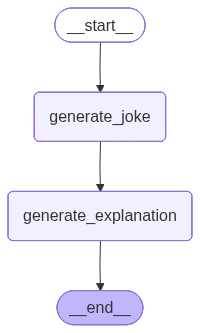

In [19]:
workflow

In [24]:
# example creation of initial state

config1 = {
    "configurable" : {"thread_id":"1"}
}

workflow.invoke({"topic": "technologia"}, config=config1)

{'topic': 'technologia',
 'joke': [{'type': 'text',
   'text': 'Here is a classic technology joke:\n\nA programmer is going to the grocery store. His wife says to him, **"Buy a loaf of bread, and if they have eggs, buy a dozen."**\n\nA little while later, he comes home with **13 loaves of bread**.\n\nHis wife looks at him in shock and asks, "Why on earth did you buy so much bread?"\n\nThe programmer replies, **"Because they had eggs!"**',
   'extras': {'signature': 'Ep4oCpsoAXLI2nxYdVBj+jj5ljPchb1NMNzJiE3I2v0a5Xq3+7CQSFeoQvVDYYWXU5ZvrTZHK5nuHxpoTUeRUYCLNsKVwwFtwb1qKRnUMgerCotgfGPrIWaeQjEdkueBXX/TzuUc0X+DE9yeOU9HlPbdUfBL1XYdlPeeBYSk0pe3641Bacg3nd2aJDw52XAR120wPRD/kkZSJS2AJxsa6r5WpUJTFbMSFSYELbqneONj640XoG5VaPNmLMhnA1hcH7lVx8/Ut2h5IwULHH6rvqPxKaiiY8hpn0e2UqLh5PzVvhsgzq7opVPh610xyhLncbERB4DClF9Dj2FuFbVu2N36ThyhvNTAmJFg8o339hMscSPPPN9QRHO8wrOkQsZC/9u9gQQ9gkp2ZggGjrv25KhHFLGtxJqm7fGx9gJ3H7/rzZc6rc9TQlnxKNaG6WVarTrQNHhGvap16v5/2R6WWDm82UB3D1lwzlE2svetfqbm/P27NkqFdqoKWGLTQutj2BS58uhcqLFRF0jo6

In [25]:
# "get_state" method to retrieve the most state recent associated state
workflow.get_state(config1)

StateSnapshot(values={'topic': 'technologia', 'joke': [{'type': 'text', 'text': 'Here is a classic technology joke:\n\nA programmer is going to the grocery store. His wife says to him, **"Buy a loaf of bread, and if they have eggs, buy a dozen."**\n\nA little while later, he comes home with **13 loaves of bread**.\n\nHis wife looks at him in shock and asks, "Why on earth did you buy so much bread?"\n\nThe programmer replies, **"Because they had eggs!"**', 'extras': {'signature': 'Ep4oCpsoAXLI2nxYdVBj+jj5ljPchb1NMNzJiE3I2v0a5Xq3+7CQSFeoQvVDYYWXU5ZvrTZHK5nuHxpoTUeRUYCLNsKVwwFtwb1qKRnUMgerCotgfGPrIWaeQjEdkueBXX/TzuUc0X+DE9yeOU9HlPbdUfBL1XYdlPeeBYSk0pe3641Bacg3nd2aJDw52XAR120wPRD/kkZSJS2AJxsa6r5WpUJTFbMSFSYELbqneONj640XoG5VaPNmLMhnA1hcH7lVx8/Ut2h5IwULHH6rvqPxKaiiY8hpn0e2UqLh5PzVvhsgzq7opVPh610xyhLncbERB4DClF9Dj2FuFbVu2N36ThyhvNTAmJFg8o339hMscSPPPN9QRHO8wrOkQsZC/9u9gQQ9gkp2ZggGjrv25KhHFLGtxJqm7fGx9gJ3H7/rzZc6rc9TQlnxKNaG6WVarTrQNHhGvap16v5/2R6WWDm82UB3D1lwzlE2svetfqbm/P27NkqFdqoKWGLTQutj2BS

In [26]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'technologia', 'joke': [{'type': 'text', 'text': 'Here is a classic technology joke:\n\nA programmer is going to the grocery store. His wife says to him, **"Buy a loaf of bread, and if they have eggs, buy a dozen."**\n\nA little while later, he comes home with **13 loaves of bread**.\n\nHis wife looks at him in shock and asks, "Why on earth did you buy so much bread?"\n\nThe programmer replies, **"Because they had eggs!"**', 'extras': {'signature': 'Ep4oCpsoAXLI2nxYdVBj+jj5ljPchb1NMNzJiE3I2v0a5Xq3+7CQSFeoQvVDYYWXU5ZvrTZHK5nuHxpoTUeRUYCLNsKVwwFtwb1qKRnUMgerCotgfGPrIWaeQjEdkueBXX/TzuUc0X+DE9yeOU9HlPbdUfBL1XYdlPeeBYSk0pe3641Bacg3nd2aJDw52XAR120wPRD/kkZSJS2AJxsa6r5WpUJTFbMSFSYELbqneONj640XoG5VaPNmLMhnA1hcH7lVx8/Ut2h5IwULHH6rvqPxKaiiY8hpn0e2UqLh5PzVvhsgzq7opVPh610xyhLncbERB4DClF9Dj2FuFbVu2N36ThyhvNTAmJFg8o339hMscSPPPN9QRHO8wrOkQsZC/9u9gQQ9gkp2ZggGjrv25KhHFLGtxJqm7fGx9gJ3H7/rzZc6rc9TQlnxKNaG6WVarTrQNHhGvap16v5/2R6WWDm82UB3D1lwzlE2svetfqbm/P27NkqFdqoKWGLTQutj2B